In [1]:
import torch
import mmcv
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot


/home/es/es_es/es_menzweil/anaconda3/envs/mmsegmentation-pyTorch-1.13.1-cuda-11.6/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config_path = '../configs/pspnet/pspnet_r101-stihl.py'
checkpoint_path = '../work_dirs/pspnet_r101-stihl/iter_216000.pth'
img_path = '../data/STIHL_SemSeg/img_dir/val/20201025_121659.010322_KUO_01.jpg'

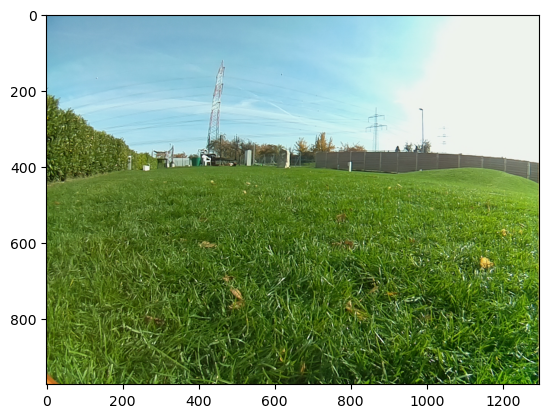

In [3]:
img = plt.imread(img_path)
plt.imshow(img)

In [4]:

# build the model from a config file and a checkpoint file
model = init_model(config_path, checkpoint_path, device='cuda:0')

# inference on given image
result = inference_model(model, img_path)

print("done")
print(result.seg_logits.data.size())

/pfs/data5/home/es/es_es/es_menzweil/Development/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/pfs/data5/home/es/es_es/es_menzweil/Development/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../work_dirs/pspnet_r101-stihl/iter_216000.pth
done
torch.Size([23, 972, 1296])


05/23 11:44:11 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


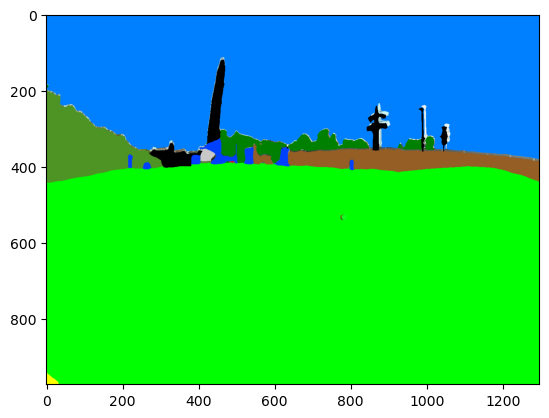

In [5]:
# display the segmentation result
vis_image = show_result_pyplot(model, img, result, draw_gt=False, draw_pred=True, opacity=1.0)
plt.imshow(vis_image)

In [6]:
# save the visualization result, the output image would be found at the path `work_dirs/result.png`
vis_image = show_result_pyplot(model, img_path, result, out_file='result.png')
